In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.


## Attribute Information

1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7).   
### Predict : Type of glass

# importing dataset

In [2]:

df=pd.read_csv(r"E:\fliprobo technologies\projects\project_3_glass.csv")
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


## Replacing column names

In [3]:
new_column_names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']
column_name_mapping = {old_name: new_name for old_name, new_name in zip(df.columns, new_column_names)}
df = df.rename(columns=column_name_mapping)
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


## dropping column Id

In [4]:
df=df.drop(columns=["Id"],axis=1)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


dropping column Id, it is not contributing any thing

In [5]:
# checking information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             213 non-null    float64
 1   Na             213 non-null    float64
 2   Mg             213 non-null    float64
 3   Al             213 non-null    float64
 4   Si             213 non-null    float64
 5   K              213 non-null    float64
 6   Ca             213 non-null    float64
 7   Ba             213 non-null    float64
 8   Fe             213 non-null    float64
 9   Type of glass  213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


here no null values present.
there are  columns RI,Na,Mg,Al,Si,K,Ca,Ba,Fe have float datatype. And there is only 1 column that is Type of glass have int datatype.

# checking unique values

In [6]:
df['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

we have to predict type of glass.it is our target, and it contains 7 types of glass class so it is a classification problem

In [7]:
# checking value count
df['Type of glass'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

Type of glass: (class attribute)  
1- building_windows_float_processed  
2- building_windows_non_float_processed  
3- vehicle_windows_float_processed  
4- vehicle_windows_non_float_processed (none in this database)  
5- containers  
6- tableware  
7- headlamps  
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7).  

# Description of Dataset

In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# checking correlation

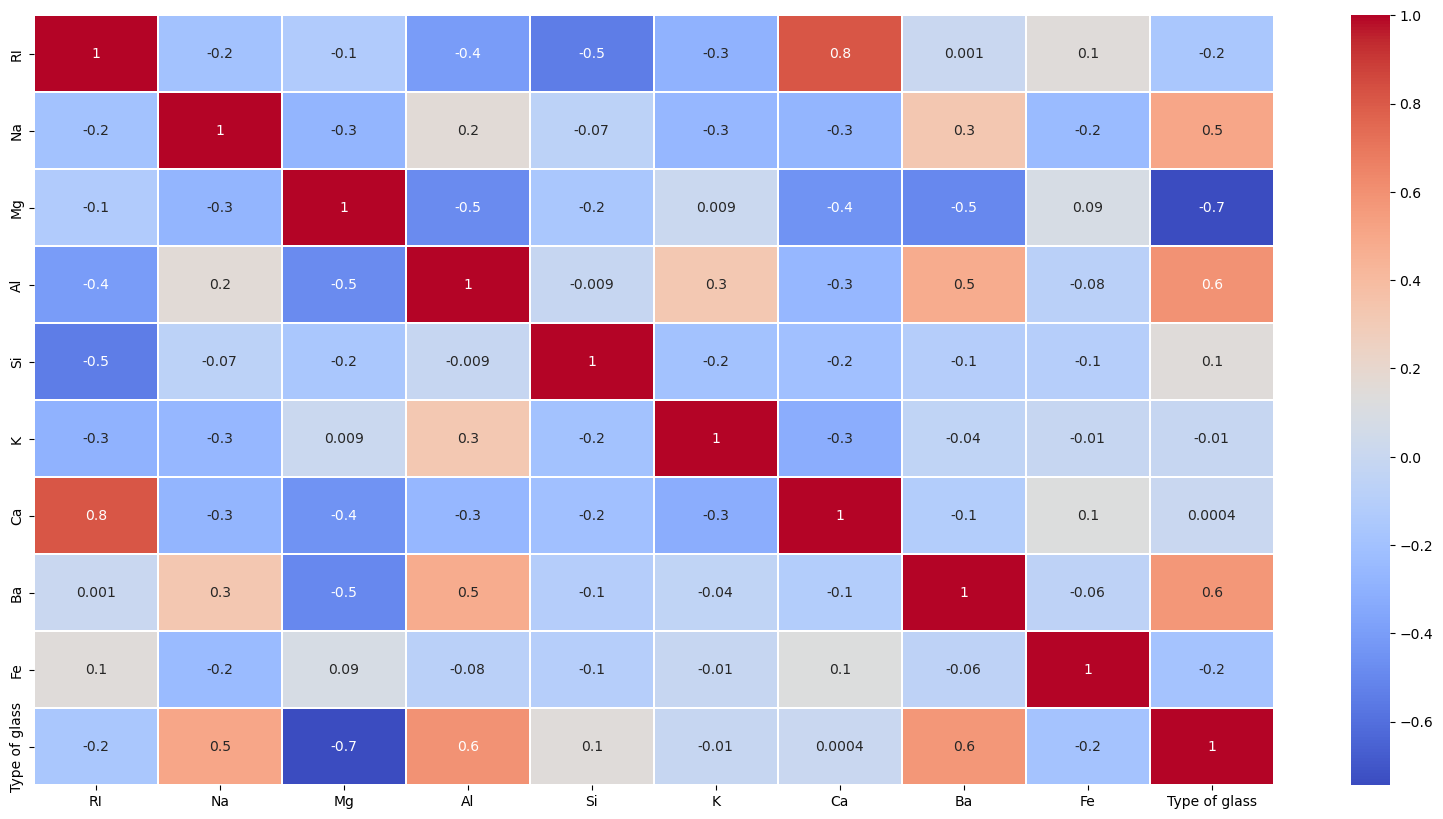

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,fmt=".1g",cmap="coolwarm")
plt.show()

there is high correlation between ca and Ri,Ba and Al,target variable have positive high correlation with ba,al,na and negative high correlation with mg

# checking correlation with target

In [10]:
df.corr()["Type of glass"].sort_values(ascending=True)

Mg              -0.744004
Fe              -0.191090
RI              -0.161322
K               -0.012765
Ca               0.000372
Si               0.147767
Na               0.504983
Ba               0.574896
Al               0.597754
Type of glass    1.000000
Name: Type of glass, dtype: float64

# visualizing the correlation between label and features using bar plot

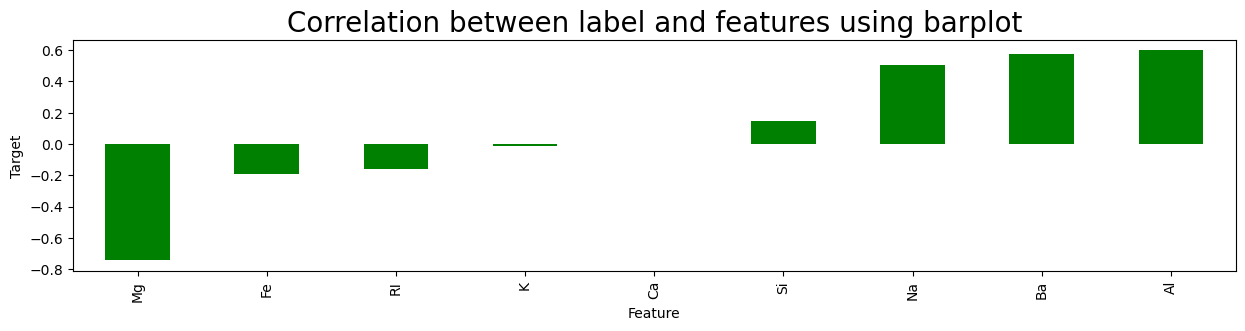

In [11]:
plt.figure(figsize=(15,3))
df.corr()['Type of glass'].sort_values(ascending=True).drop(['Type of glass']).plot(kind='bar',color='green')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('Target',fontsize=10)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

# checking skewness

In [12]:
df.skew()

RI               1.639658
Na               0.457318
Mg              -1.154323
Al               0.900017
Si              -0.744546
K                6.549276
Ca               2.040591
Ba               3.406749
Fe               1.747173
Type of glass    1.108861
dtype: float64

except na all features have skewness

# checking distribution

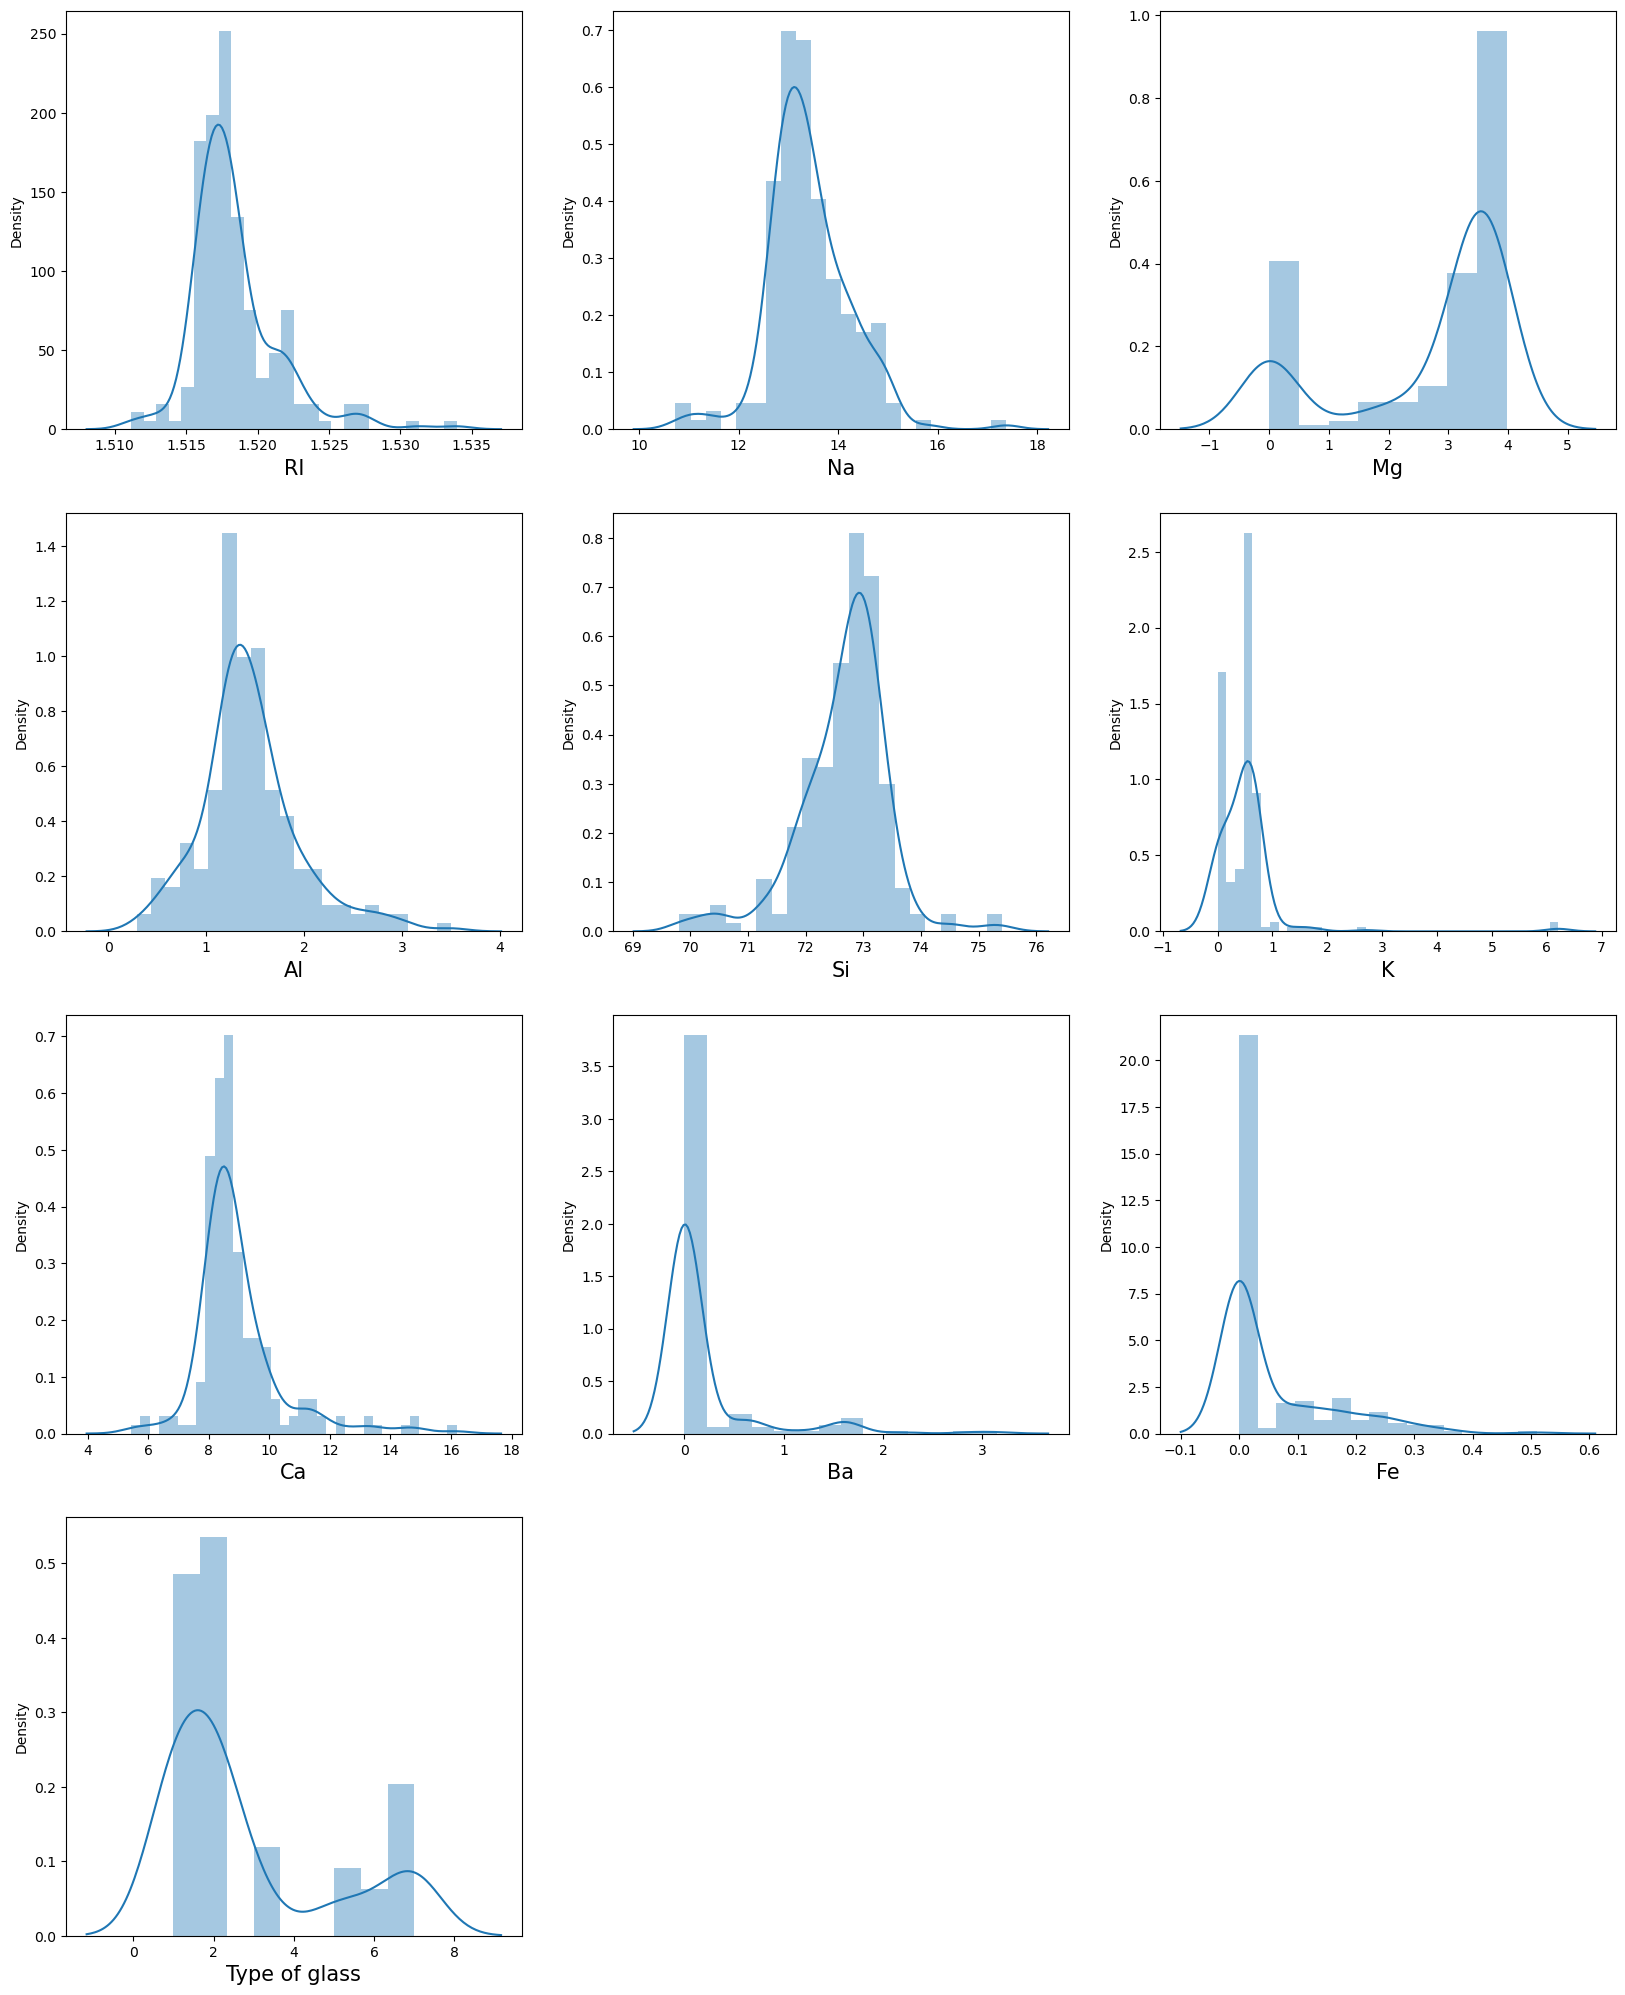

In [13]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=14:
        ac=plt.subplot(4,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show()   

features RI,MG,AL,SI,K,Ca,Ba,Fe are highly skewed
Type of glass are categorical column and it is our target so we cannot check skewness in it.

# checking the outliers

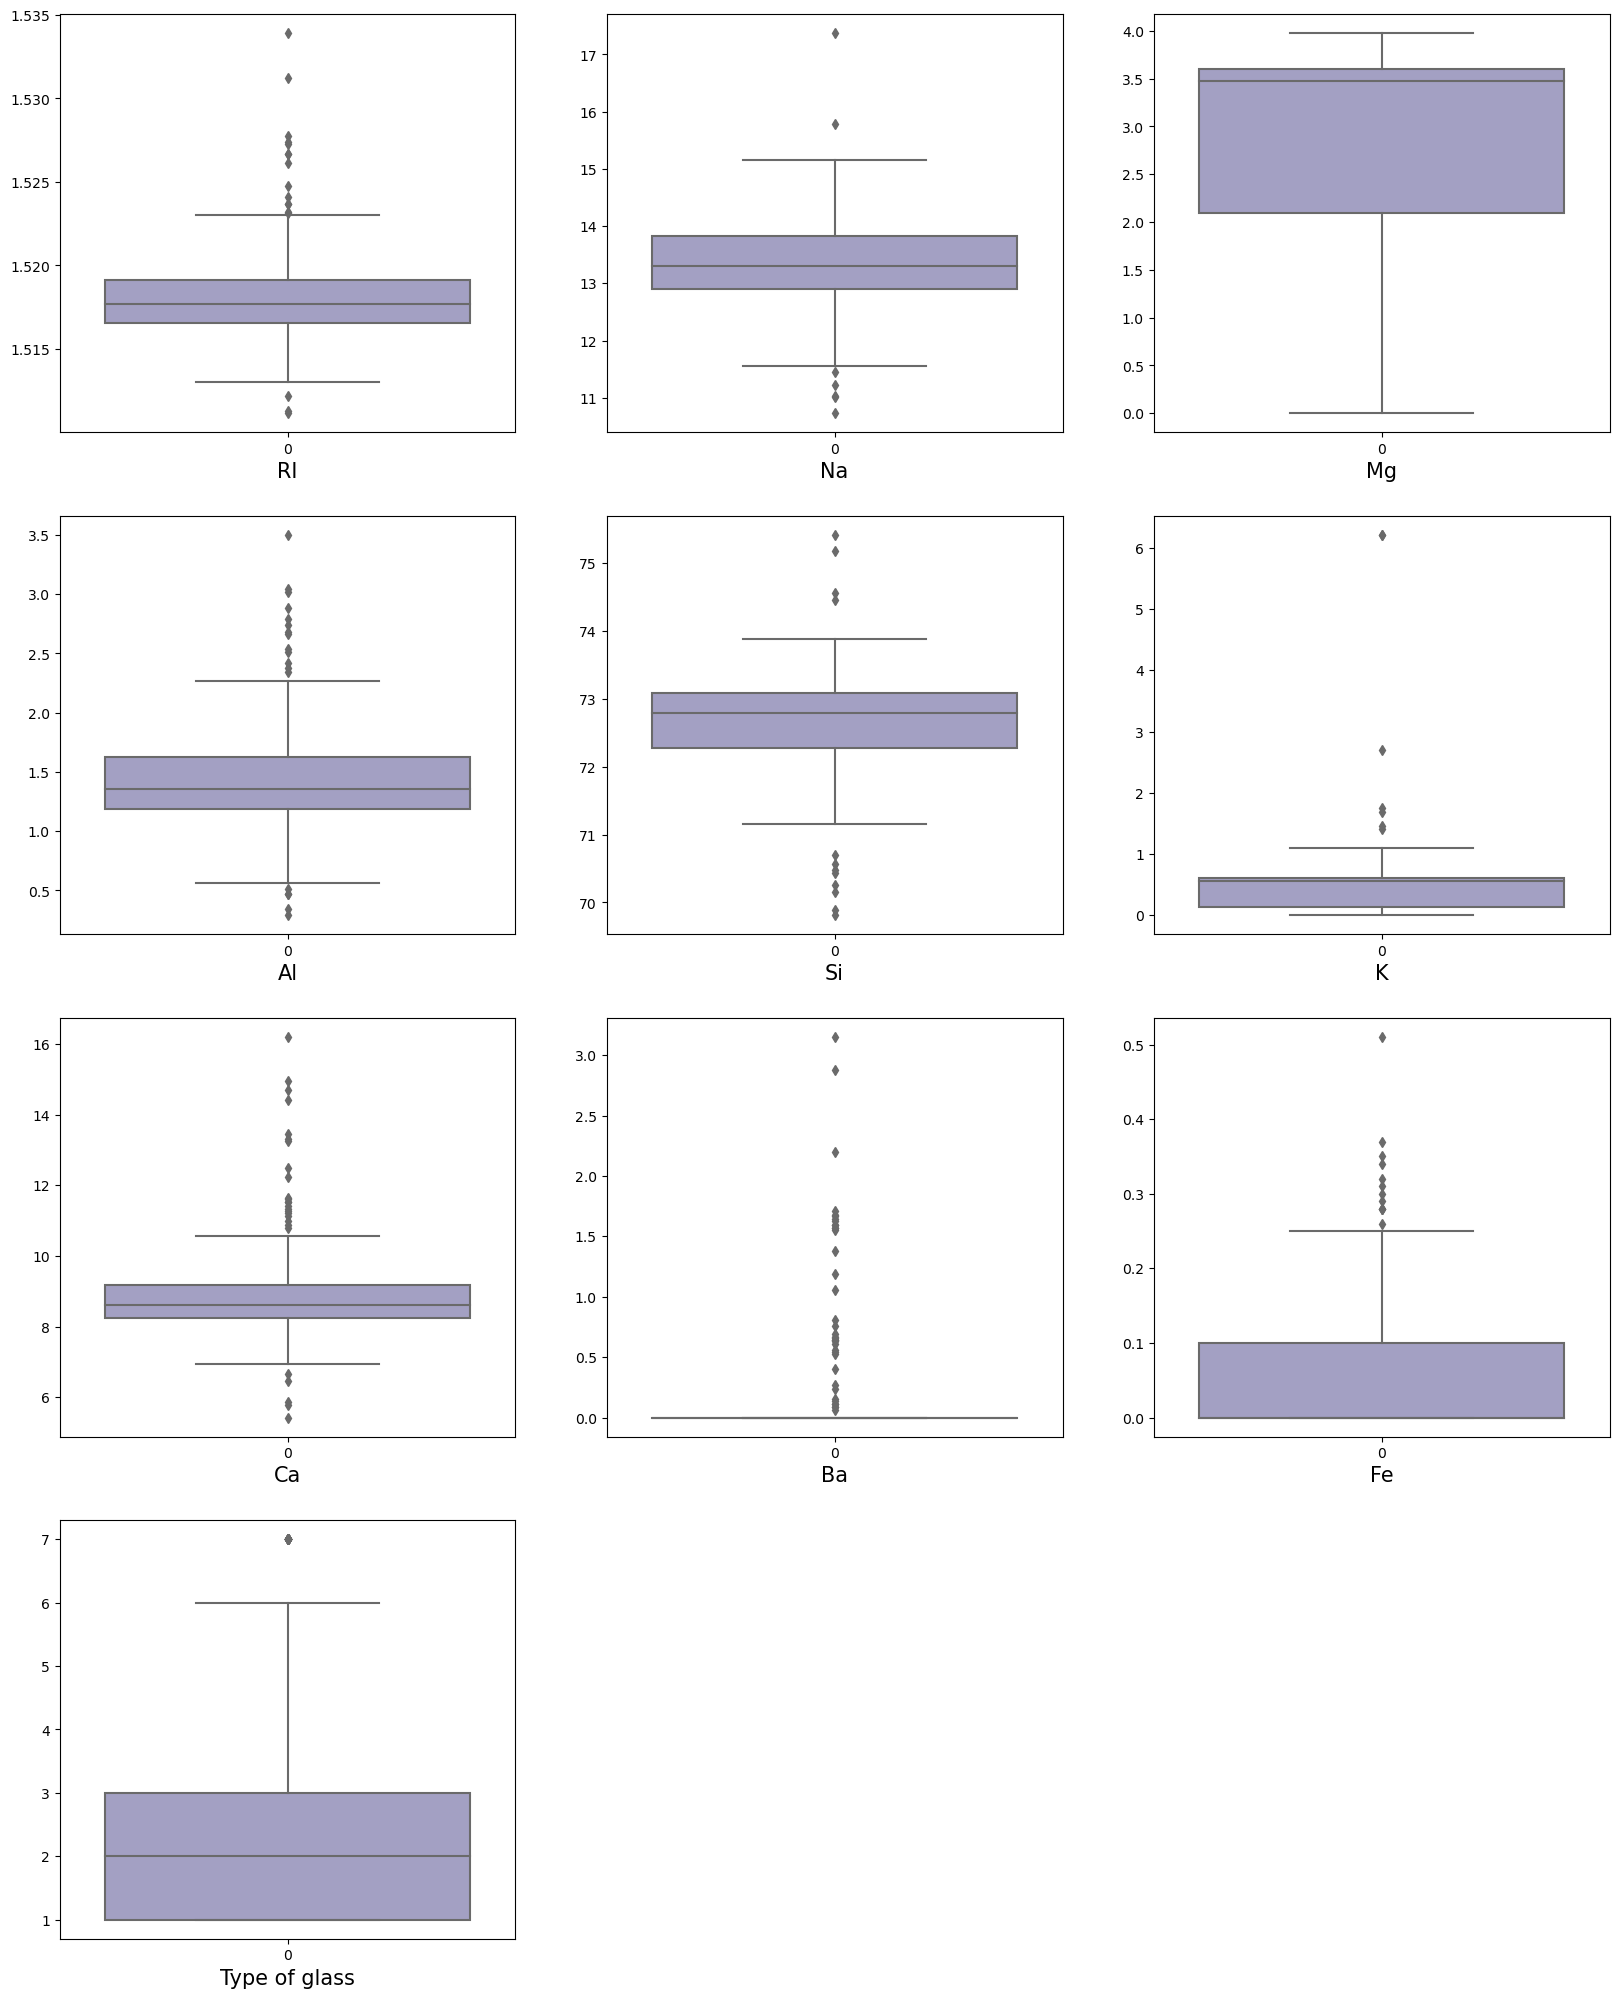

In [14]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=14:
        ac=plt.subplot(4,3,plotnumber)
        sns.boxplot(data=df[col],palette='Purples_r')
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show() 

# removing outliers

In [15]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(213, 10)

In [16]:
print(np.where(z>3))

(array([104, 105, 105, 105, 105, 105, 106, 106, 106, 109, 110, 111, 111,
       130, 144, 161, 162, 162, 162, 170, 170, 171, 171, 173, 183, 183,
       187, 188, 200, 200, 202, 206, 212], dtype=int64), array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
       5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))


In [17]:
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(213, 10)
(193, 10)


# dataloss

In [18]:
loss=(df.shape[0]-df1.shape[0])/df.shape[0]*100
print(loss)

9.389671361502346


approx 10% of data loss

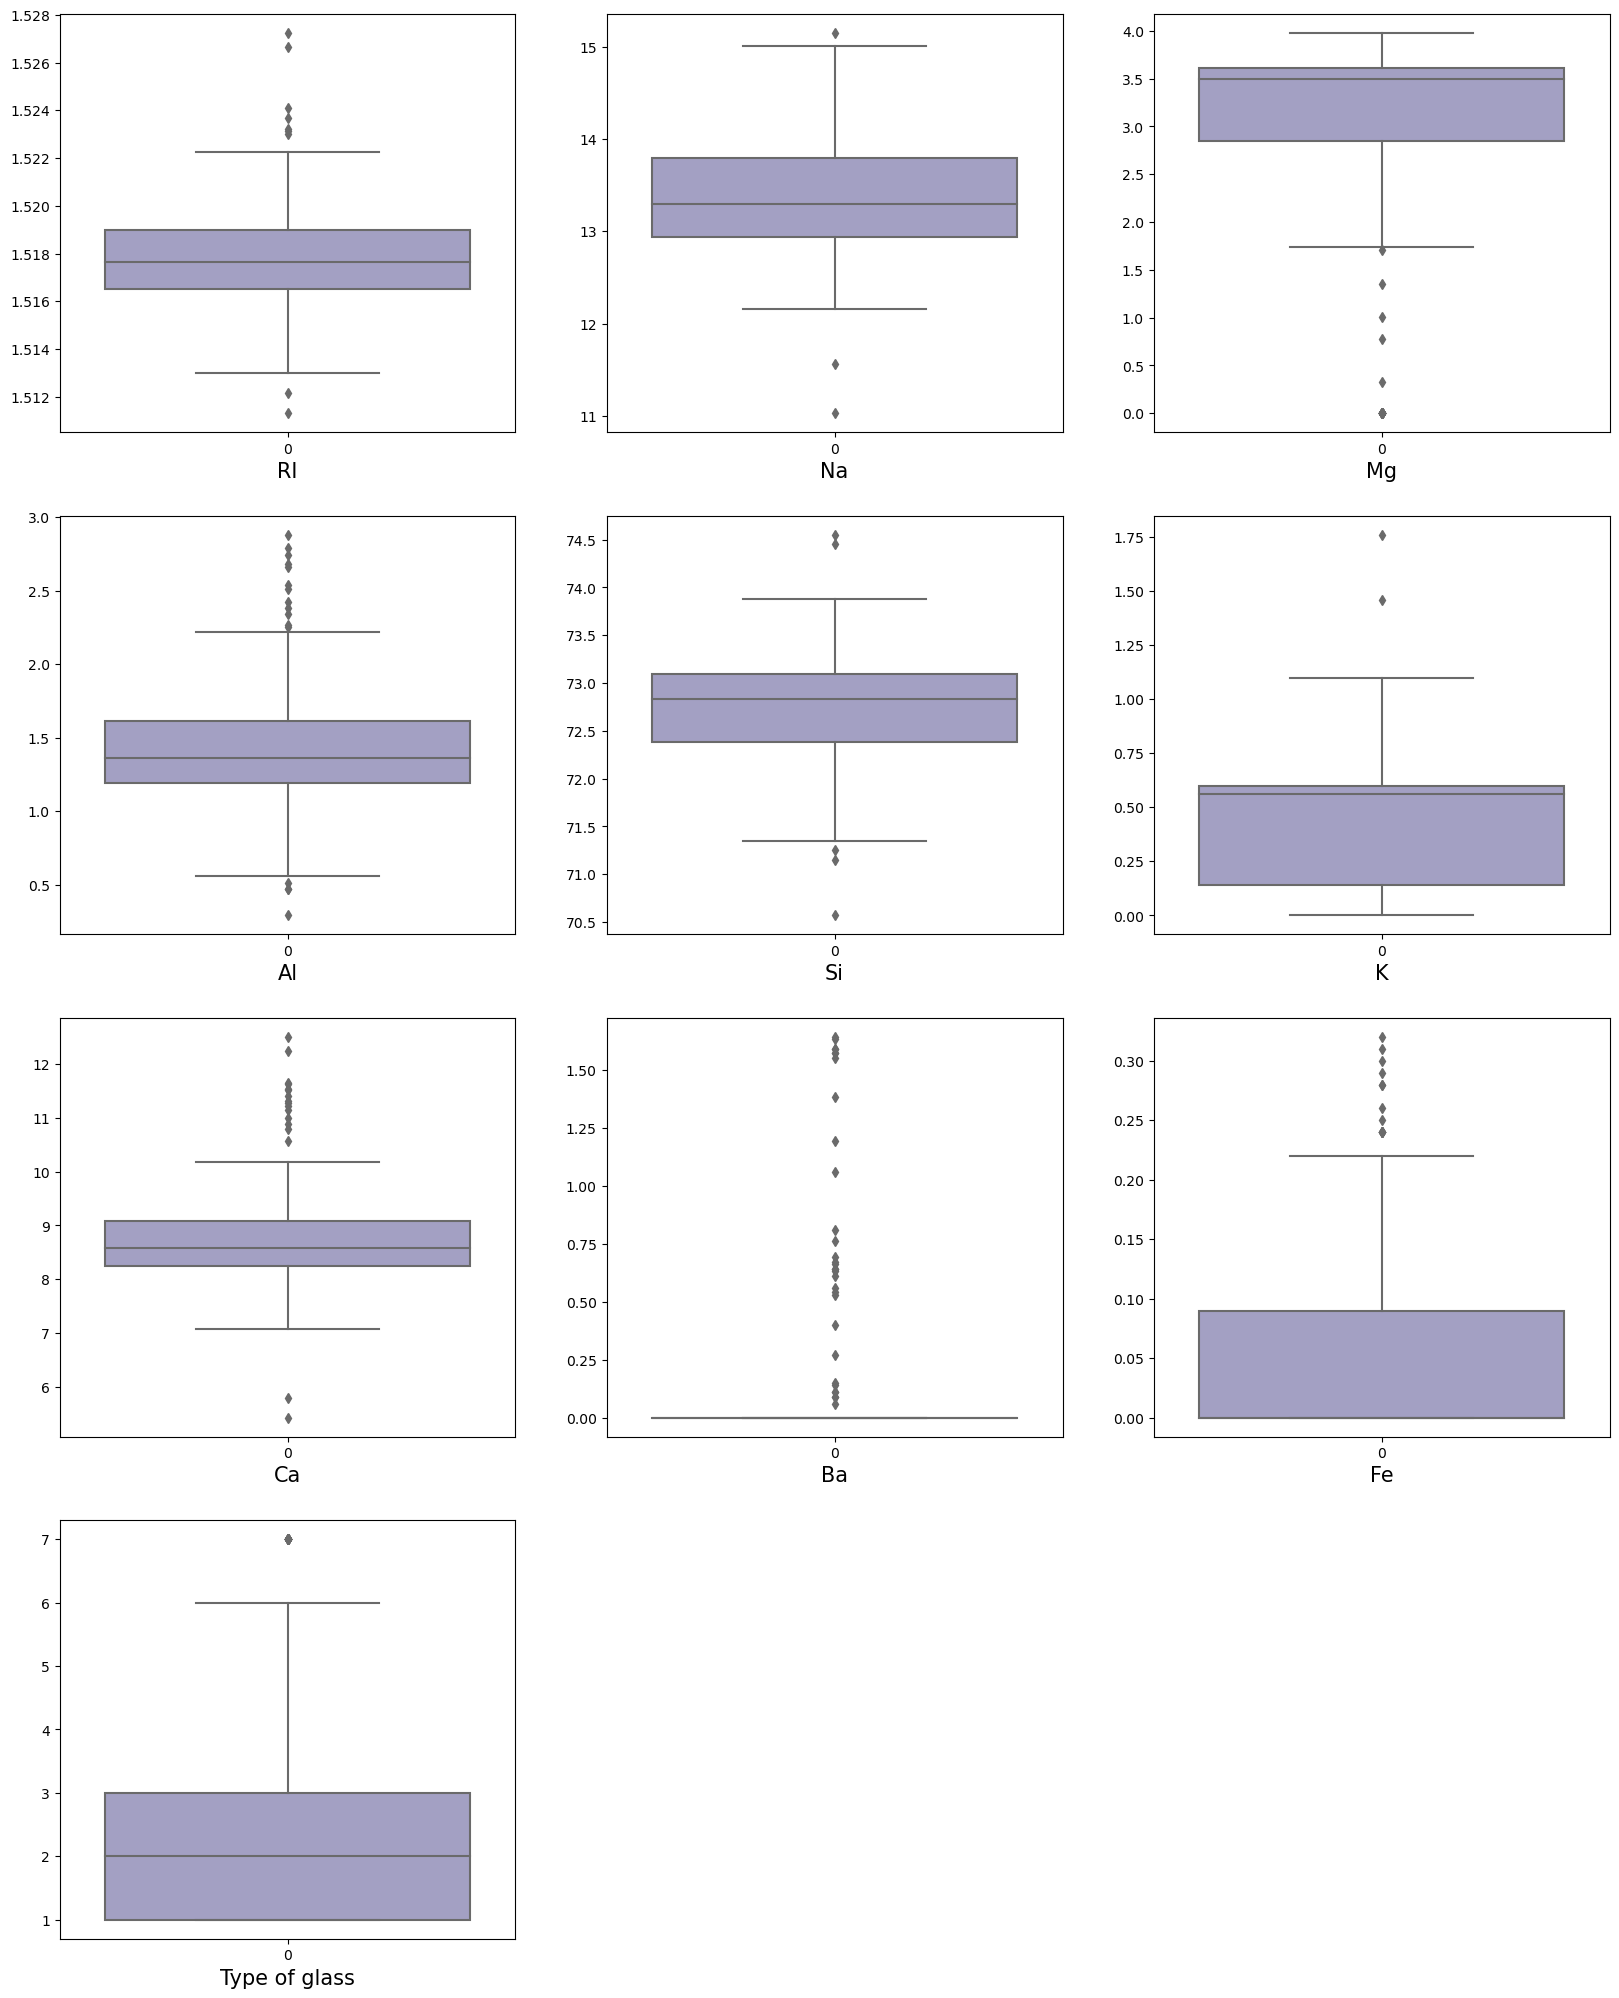

In [19]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for col in df1:
    if plotnumber<=14:
        ac=plt.subplot(4,3,plotnumber)
        sns.boxplot(data=df1[col],palette='Purples_r')
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show() 

In [20]:
print(np.where(z<-3))

(array([], dtype=int64), array([], dtype=int64))


no outliers present below minimum

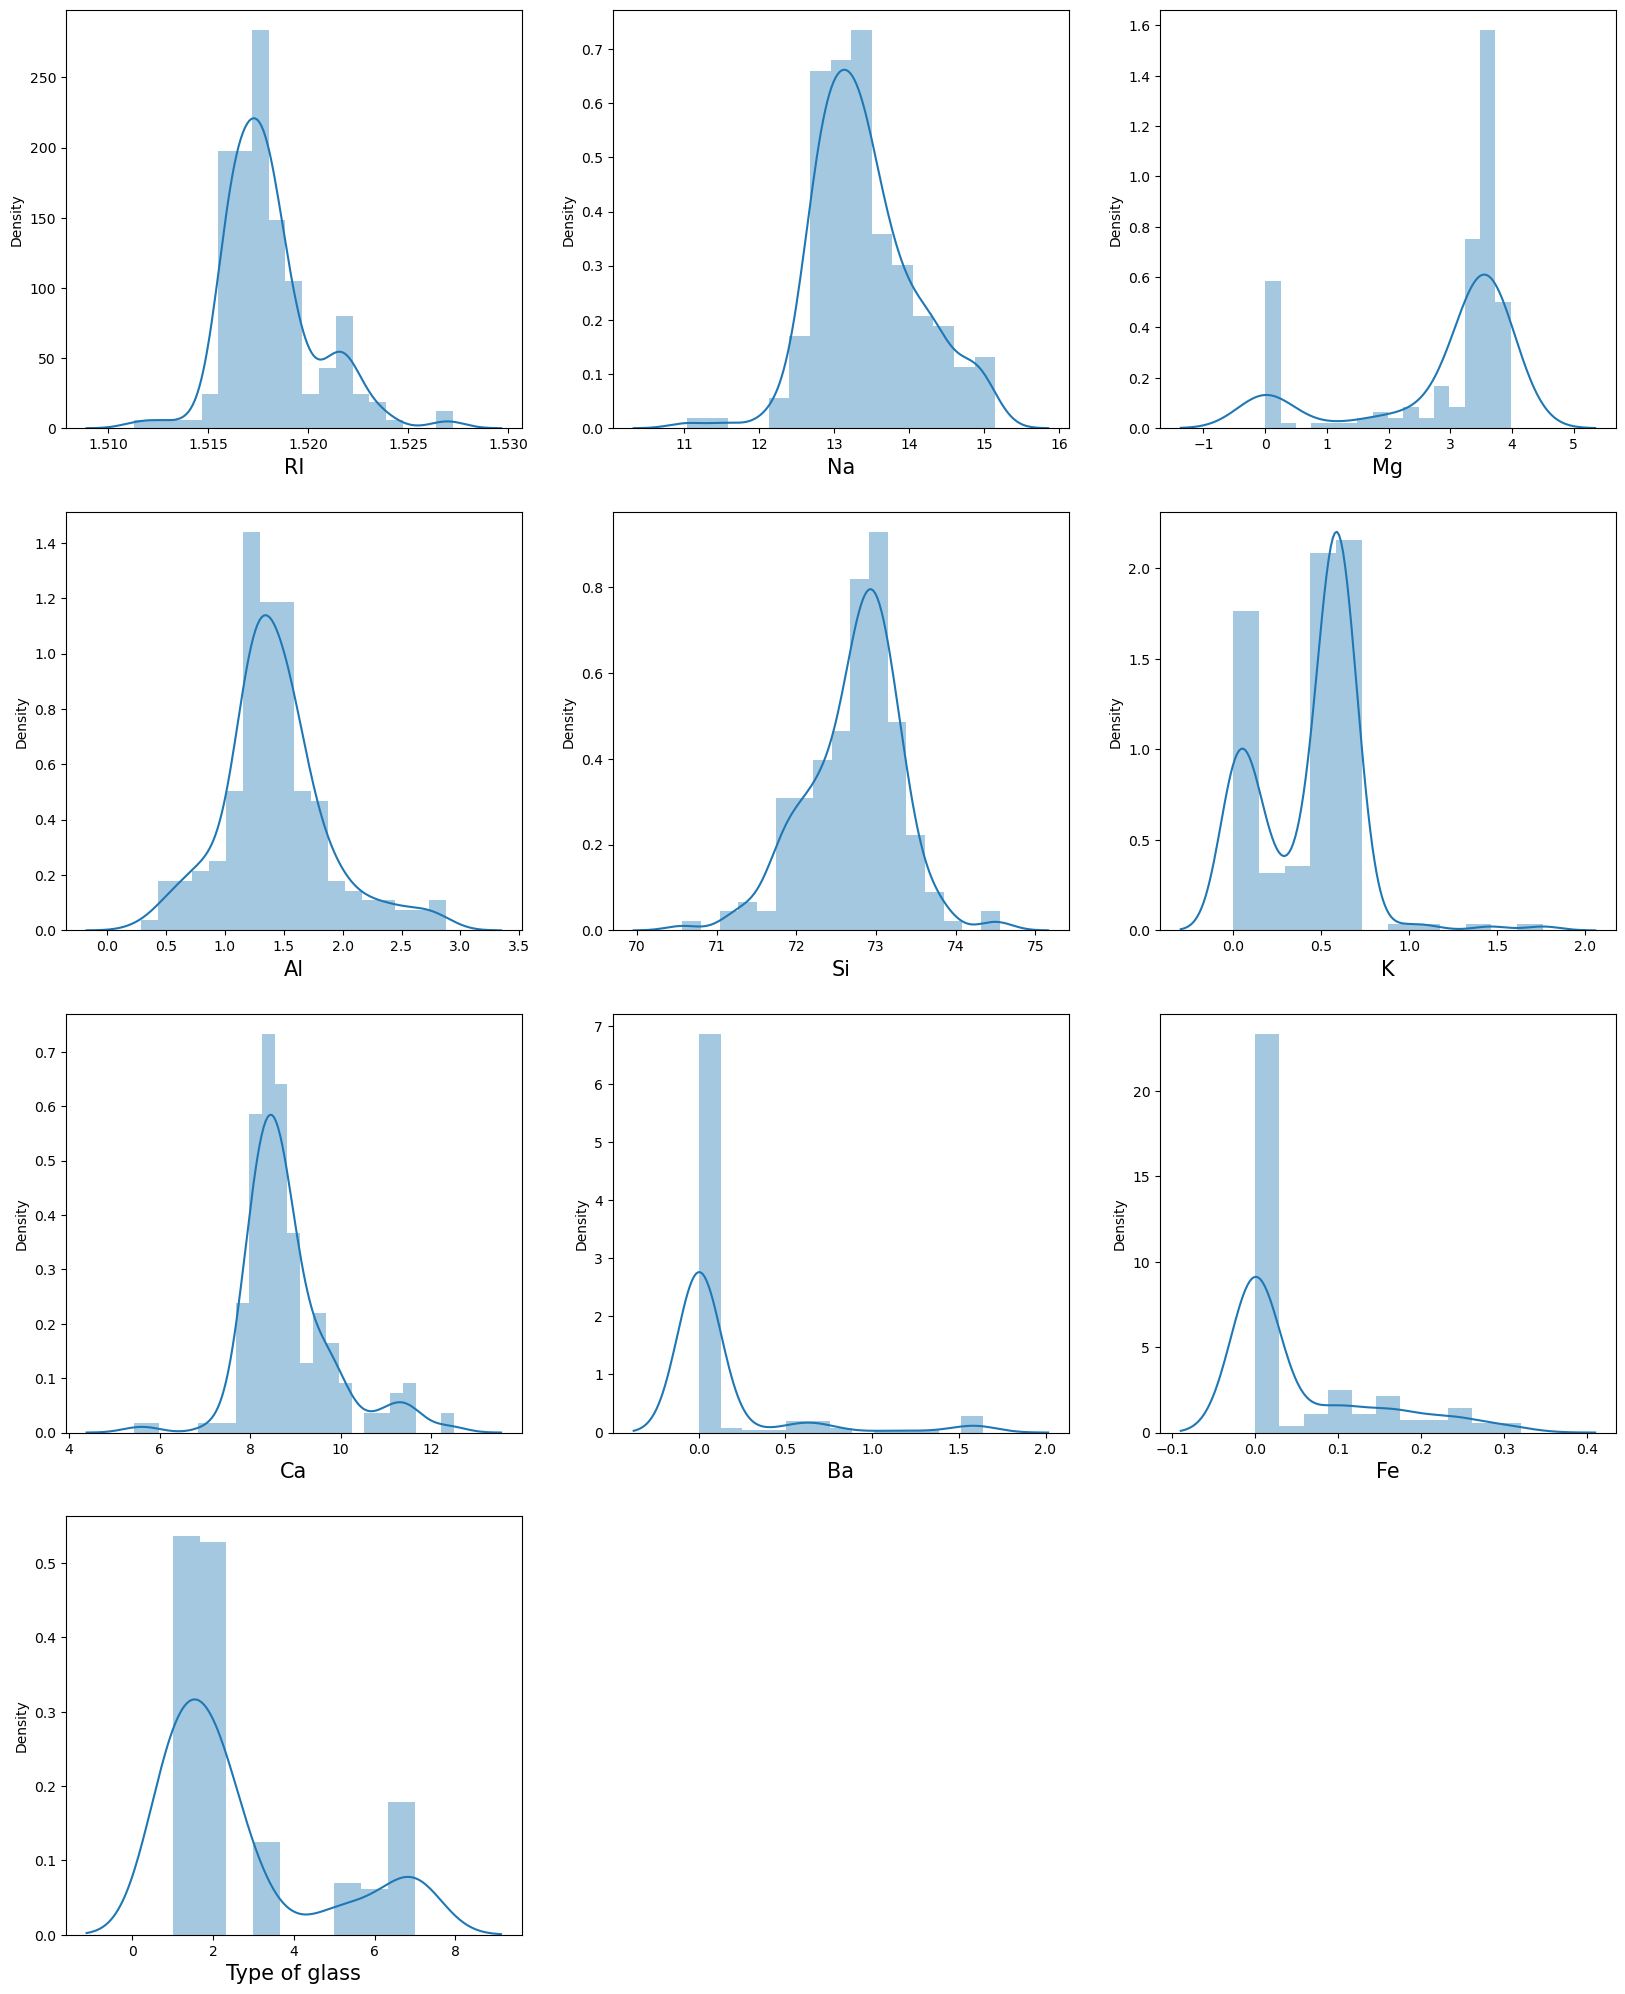

In [21]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for col in df1:
    if plotnumber<=14:
        ac=plt.subplot(4,3,plotnumber)
        sns.distplot(df1[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show()

In [22]:
df1.skew()

RI               0.971729
Na               0.375857
Mg              -1.533664
Al               0.649917
Si              -0.436288
K                0.297900
Ca               1.074092
Ba               3.178256
Fe               1.478611
Type of glass    1.277279
dtype: float64

# Removing skewness

In [23]:
import numpy as np

for i in df1.columns:
    if i not in ["Type of glass"]:
        if df1[i].skew()<0.5 and df1[i].skew()> -0.5:
            continue
        elif df1[i].skew() > 0.5 or df1[i].skew() < -0.5:
            df1[i] = np.cbrt(df1[i])

In [24]:
df1.skew()

RI               0.966994
Na               0.375857
Mg              -1.892297
Al              -0.384210
Si              -0.436288
K                0.297900
Ca               0.609725
Ba               2.198820
Fe               0.875093
Type of glass    1.277279
dtype: float64

In [25]:
import numpy as np

for i in df1.columns:
    if i not in ["Type of glass"]:
        if df1[i].skew()<0.5 and df1[i].skew()> -0.5:
            continue
        elif df1[i].skew() > 0.5 or df1[i].skew() < -0.5:
            df1[i] = np.cbrt(df1[i])

In [26]:
df1.skew()

RI               0.965416
Na               0.375857
Mg              -2.007612
Al              -0.384210
Si              -0.436288
K                0.297900
Ca               0.430377
Ba               1.915227
Fe               0.764210
Type of glass    1.277279
dtype: float64

# seperating features and label

In [27]:
x=df1.drop("Type of glass",axis=1)
y=df1["Type of glass"]

# Feature Scaling using Standard Scalarization

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-0.190955,0.704498,0.440246,-0.038435,0.007760,0.165576,-1.042730,-0.434514,-0.694083
1,-0.819397,0.169658,0.435805,0.352328,0.455342,-0.154697,-1.100786,-0.434514,-0.694083
2,-0.168991,-0.305754,0.448105,-0.199718,-0.198816,0.485849,-0.600876,-0.434514,-0.694083
3,-0.274424,-0.216615,0.442007,-0.318527,0.610275,0.414677,-0.768569,-0.434514,-0.694083
4,-0.916127,-0.929734,0.441128,0.516242,0.420913,0.734950,-0.768569,-0.434514,1.582287
...,...,...,...,...,...,...,...,...,...
188,-0.722679,1.417617,-2.420135,2.390986,0.214336,-1.542547,0.680026,2.260075,-0.694083
189,-0.797414,1.075914,-2.420135,2.586397,-0.198816,-1.257860,0.412117,2.469765,-0.694083
190,-0.524887,2.234732,-2.420135,1.211227,0.575845,-1.542547,-0.403199,2.603600,-0.694083
191,1.143285,1.402760,-2.420135,1.263662,1.195574,-1.542547,-0.359782,2.614069,-0.694083


We have Scaled the data using standard Scalarization method to overcome the issue of biasness

# Checking variance inflation factor

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,4.871744,RI
1,5.681052,Na
2,6.800932,Mg
3,2.449132,Al
4,3.982438,Si
5,3.804964,K
6,6.003073,Ca
7,2.503376,Ba
8,1.055731,Fe


on checking multicollinearity we found vif value is greater than 5 in Na,Mg,Ca .but we cannot delete any of the feature because they have high correlation with the target

# finding the best random state

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0         # maximum accuracy
maxRS=0           # maximum random state
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)  
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print(" Best accuracy is",maxAccu,"at random_state",maxRS)     

 Best accuracy is 0.9137931034482759 at random_state 177


# creating train test split

In [31]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=maxRS)

# classification Algorithms

In [32]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [33]:
# checking accuracy for RandomForestclassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.896551724137931
[[23  1  0  0  0]
 [ 2 15  0  1  0]
 [ 0  0  2  0  0]
 [ 0  0  0  2  0]
 [ 0  2  0  0 10]]
              precision    recall  f1-score   support

           1       0.92      0.96      0.94        24
           2       0.83      0.83      0.83        18
           5       1.00      1.00      1.00         2
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91        12

    accuracy                           0.90        58
   macro avg       0.88      0.93      0.90        58
weighted avg       0.90      0.90      0.90        58



the accuracy of the model is 90%

# Logistic Regression

In [34]:
# checking accuracy for LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.6551724137931034
[[14  8  2  0  0  0]
 [ 5 10  1  0  2  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  2  0  0  0 10]]
              precision    recall  f1-score   support

           1       0.74      0.58      0.65        24
           2       0.50      0.56      0.53        18
           3       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         2
           6       0.50      1.00      0.67         2
           7       1.00      0.83      0.91        12

    accuracy                           0.66        58
   macro avg       0.62      0.66      0.63        58
weighted avg       0.72      0.66      0.68        58



the accuracy of the model is 66%

# Support Vector Machine Classifier

In [35]:
# checking accuracy for Support Vector Machine Classifier
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7241379310344828
[[16  8  0  0  0]
 [ 3 13  1  1  0]
 [ 0  0  2  0  0]
 [ 1  0  0  1  0]
 [ 0  2  0  0 10]]
              precision    recall  f1-score   support

           1       0.80      0.67      0.73        24
           2       0.57      0.72      0.63        18
           5       0.67      1.00      0.80         2
           6       0.50      0.50      0.50         2
           7       1.00      0.83      0.91        12

    accuracy                           0.72        58
   macro avg       0.71      0.74      0.71        58
weighted avg       0.75      0.72      0.73        58



the accuracy of the model is 72%

# GradientBoostingClassifier

In [36]:
# checking accuracy for GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.896551724137931
[[24  0  0  0  0]
 [ 2 14  1  1  0]
 [ 0  0  2  0  0]
 [ 0  0  0  2  0]
 [ 1  1  0  0 10]]
              precision    recall  f1-score   support

           1       0.89      1.00      0.94        24
           2       0.93      0.78      0.85        18
           5       0.67      1.00      0.80         2
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91        12

    accuracy                           0.90        58
   macro avg       0.83      0.92      0.86        58
weighted avg       0.91      0.90      0.90        58



the accuracy of the model is 90%

# AdaBoost Classifier

In [37]:
# checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.43103448275862066
[[ 0 24  0  0  0]
 [ 0 15  0  3  0]
 [ 0  0  0  2  0]
 [ 0  2  0  0  0]
 [ 2  0  0  0 10]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        24
           2       0.37      0.83      0.51        18
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       1.00      0.83      0.91        12

    accuracy                           0.43        58
   macro avg       0.27      0.33      0.28        58
weighted avg       0.32      0.43      0.35        58



the accuracy of the model is 43%

# BaggingClassifier

In [38]:
# checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.7241379310344828
[[19  5  0  0  0  0]
 [ 4 10  1  0  2  1]
 [ 0  0  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  1  0  1  0]
 [ 1  1  0  0  0 10]]
              precision    recall  f1-score   support

           1       0.79      0.79      0.79        24
           2       0.62      0.56      0.59        18
           3       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         2
           6       0.33      0.50      0.40         2
           7       0.91      0.83      0.87        12

    accuracy                           0.72        58
   macro avg       0.61      0.61      0.61        58
weighted avg       0.76      0.72      0.74        58



the accuracy of the model is 78%

# ExtraTreesClassifier

In [39]:
# checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8620689655172413
[[21  3  0  0  0]
 [ 1 15  0  2  0]
 [ 0  0  2  0  0]
 [ 0  0  0  2  0]
 [ 0  2  0  0 10]]
              precision    recall  f1-score   support

           1       0.95      0.88      0.91        24
           2       0.75      0.83      0.79        18
           5       1.00      1.00      1.00         2
           6       0.50      1.00      0.67         2
           7       1.00      0.83      0.91        12

    accuracy                           0.86        58
   macro avg       0.84      0.91      0.86        58
weighted avg       0.89      0.86      0.87        58



the accuracy of the model is 86%

# cross valdation score

In [40]:
# checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predRFC)-score.mean())

[0.69230769 0.71794872 0.74358974 0.57894737 0.78947368]
0.7044534412955465
Difference between Accuracy score and cross validation score is- 0.1920982828423845


In [41]:
# checking cv score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predLR)-score.mean())

[0.58974359 0.69230769 0.66666667 0.65789474 0.65789474]
0.6529014844804318
Difference between Accuracy score and cross validation score is- 0.002270929312671588


In [42]:
# checking cv score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predGB)-score.mean())

[0.71794872 0.71794872 0.76923077 0.65789474 0.68421053]
0.70944669365722
Difference between Accuracy score and cross validation score is- 0.18710503048071103


In [43]:
# checking cv score for Support vector machine Classifier
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predsvc)-score.mean())

[0.58974359 0.74358974 0.64102564 0.76315789 0.71052632]
0.6896086369770581
Difference between Accuracy score and cross validation score is- 0.034529294057424664


In [44]:
# checking cv score for Adaboost Classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predABC)-score.mean())

[0.46153846 0.51282051 0.53846154 0.47368421 0.42105263]
0.4815114709851551
Difference between Accuracy score and cross validation score is- -0.05047698822653446


In [45]:
# checking cv score for Bagging Classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predBC)-score.mean())

[0.64102564 0.56410256 0.71794872 0.52631579 0.71052632]
0.6319838056680162
Difference between Accuracy score and cross validation score is- 0.09215412536646661


In [46]:
# checking cv score for Support ExtraTrees Classifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predET)-score.mean())

[0.64102564 0.71794872 0.74358974 0.63157895 0.73684211]
0.6941970310391363
Difference between Accuracy score and cross validation score is- 0.167871934478105


Support vector machine Classifier is our best model as the difference between accuracy score and cross validation score is least. i.e(0.03)

# Hyper parameter tuning

In [47]:
# Support vector machine Classifier 
from sklearn.model_selection import GridSearchCV

parameters={'C':[1,5,10,20],
           'gamma':[0.001,0.01,0.02,0.002]}

In [48]:
gCV=GridSearchCV(SVC(),parameters,cv=5)

In [49]:
gCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'gamma': [0.001, 0.01, 0.02, 0.002]})

In [50]:
gCV.best_params_

{'C': 10, 'gamma': 0.02}

In [64]:
final_model=SVC(C=20,gamma=0.02)
final_model.fit(x_train,y_train)
Pred=final_model.predict(x_test)
acc=accuracy_score(y_test,Pred)
print(acc*100)

74.13793103448276


after hyperparameter tuning accuracy increased by 0.4%

# saving the model

In [65]:
import joblib
joblib.dump(final_model,"glass_identification.pkl")

['glass_identification.pkl']

# predicting by using the saved model

In [66]:
# lets load the saved model and get the prediction
model=joblib.load('glass_identification.pkl')

# predictions
prediction=model.predict(x_test)
prediction

array([2, 6, 1, 1, 2, 2, 3, 2, 2, 1, 2, 7, 2, 3, 2, 2, 1, 1, 2, 2, 1, 1,
       1, 7, 1, 1, 6, 2, 5, 1, 2, 2, 7, 2, 7, 2, 1, 7, 5, 6, 2, 2, 2, 7,
       2, 1, 1, 1, 2, 7, 7, 7, 7, 1, 2, 2, 1, 1], dtype=int64)

In [67]:
# creating a dataframe
conclusion=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
Predicted,2,6,1,1,2,2,3,2,2,1,...,2,7,7,7,7,1,2,2,1,1
Original,1,2,1,1,2,7,1,1,2,1,...,7,7,7,7,7,2,2,1,1,1
